## Observations and Insights 

In [13]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_mouse = pd.merge(mouse_metadata,study_results, on="Mouse ID", how= "left")

# Display the data table for preview
merge_mouse.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [14]:
# Checking the number of mice.


In [15]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 



In [16]:
# Optional: Get all the data for the duplicate mouse ID. 



In [17]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


In [18]:
# Checking the number of mice in the clean DataFrame.


## Summary Statistics

In [19]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
summ_df = merge_mouse.groupby("Drug Regimen")

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_tumor = summ_df['Tumor Volume (mm3)'].mean()
median_tumor = summ_df['Tumor Volume (mm3)'].median()
dev_tumor = summ_df['Tumor Volume (mm3)'].std()
sem_tumor = summ_df['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary dataframe.
tumor_sum_df = pd.DataFrame({'Mean': mean_tumor, 'Standard Deviation' : dev_tumor, 'Median' : median_tumor, 'SEM' : sem_tumor})
tumor_sum_df

,Mean,Standard Deviation,Median,SEM
Drug Regimen,,,,
Capomulin,40.675741,4.994774,41.557809,0.329346
Ceftamin,52.591172,6.268188,51.776157,0.469821
Infubinol,52.884795,6.567243,51.820584,0.492236
Ketapril,55.235638,8.279709,53.698743,0.603860
Naftisol,54.331565,8.134708,52.509285,0.596466
Placebo,54.033581,7.821003,52.288934,0.581331
Propriva,52.322552,6.507770,50.854632,0.512884
Ramicane,40.216745,4.846308,40.673236,0.320955
Stelasyn,54.233149,7.710419,52.431737,0.573111


In [20]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_sum_df.describe()


,Mean,Standard Deviation,Median,SEM
count,10.000000,10.000000,10.000000,10.000000
mean,50.976144,6.809671,49.942960,0.499641
std,5.621333,1.218709,4.712429,0.102544
min,40.216745,4.846308,40.673236,0.320955
25%,52.389707,6.328083,51.085014,0.475424
50%,53.060651,6.766916,51.819532,0.514641
75%,54.183257,7.793357,52.396036,0.579276
max,55.235638,8.279709,53.698743,0.603860


In [21]:
# Using the aggregation method, produce the same summary statistics in a single line
tumor_sum_df.agg

<bound method DataFrame.aggregate of                    Mean  Standard Deviation     Median       SEM
Drug Regimen                                                    
Capomulin     40.675741            4.994774  41.557809  0.329346
Ceftamin      52.591172            6.268188  51.776157  0.469821
Infubinol     52.884795            6.567243  51.820584  0.492236
Ketapril      55.235638            8.279709  53.698743  0.603860
Naftisol      54.331565            8.134708  52.509285  0.596466
Placebo       54.033581            7.821003  52.288934  0.581331
Propriva      52.322552            6.507770  50.854632  0.512884
Ramicane      40.216745            4.846308  40.673236  0.320955
Stelasyn      54.233149            7.710419  52.431737  0.573111
Zoniferol     53.236507            6.966589  51.818479  0.516398>

## Bar and Pie Charts

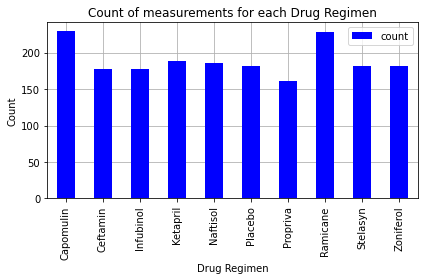

In [22]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
measure_cnt = pd.DataFrame(summ_df.agg(count = ("Drug Regimen", "count")))
measure_chrt = measure_cnt.plot(kind = 'bar', title = "Count of measurements for each Drug Regimen", color="blue", zorder=3)

#Now I need labels
measure_chrt.set_xlabel("Drug Regimen")
measure_chrt.set_ylabel("Count")
measure_chrt.grid(zorder = 0)
plt.tight_layout()

#Show Plot
plt.show()


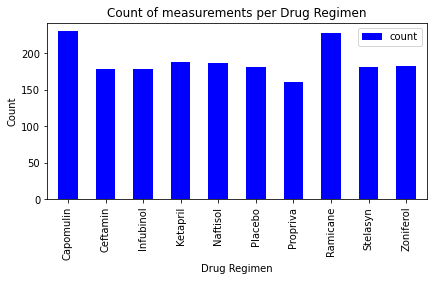

In [25]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_axis = np.arange(len(summ_df))
le_tix = [value for value in x_axis]

plt.figure(figsize=(6.8,3.25))
plt.bar(x_axis, measure_cnt["count"], color='blue', align="center", width= 0.52, zorder = 3)
plt.xticks(le_tix, list(measure_cnt.index), rotation="vertical")

#x and y limits
plt.xlim(-0.55, len(x_axis)-0.45)
plt.ylim(0, max(measure_cnt["count"])*1.05)

#Labels
plt.title("Count of Measurements (per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")

#Legend
column_nombre = ["count"]
plt.legend(column_nombre, loc="best")
plt.grid

#Show Plot
plt.show()

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
